In [1]:
import modules.latent_space_mapping
import modules.restore_networks
from os.path import split, join
import resources.sinusoidal
import numpy as np
# Matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import win32api
import modules.visualization
%matplotlib inline

# Latent Space Mapping 
### Recovery
This notebook has the purpose of recovering the saved models obtained by mapping the latent spaces obtained from sinusoidal data. The folowing steps are carried out:
1.- Define the architecture of the network. This includes the order of the mapping between latent spaces. 

In [2]:
# Define the decoder architecture for the mapping of latent spaces
names = ['HeatKernel', 'Normal', 'Human']
names2 = ['hk', 'normal', 'human']
order = (0, 2) #Tuple with the mapping order
data_dimensions = 50 
learning_rate = 0.0001
vae = modules.latent_space_mapping.vae_nn_mapping(learning_rate, order, data_dimensions)

# Define the path of the model weights to be used
RECOVER_PATH = "C:\\Users\\Luis Pérez\\Documents\\Master\\TUE\\Final Project\\TensorFlow Models\\joined_models\\Appropriate_models"
model_name = names2[order[0]]+"_"+names2[order[1]]+".cpkt"
model_path = join(RECOVER_PATH, model_name)

Mapping from HeatKernel to Human


In [3]:
# Load encodings in latent space of the sinusoidal data used for training
normal_code = np.load('normal_encoding.npy')
hk_code = np.load('hk_encoding.npy')
# Generate samples from input latent space and map it to the second latent space
samples, mapped_samples = vae.map_latent_space(1000, weights_folder=model_path)
# Decode the values obtained
decoded1, decoded2 = vae.decode_codes(samples, weights_folder=model_path)

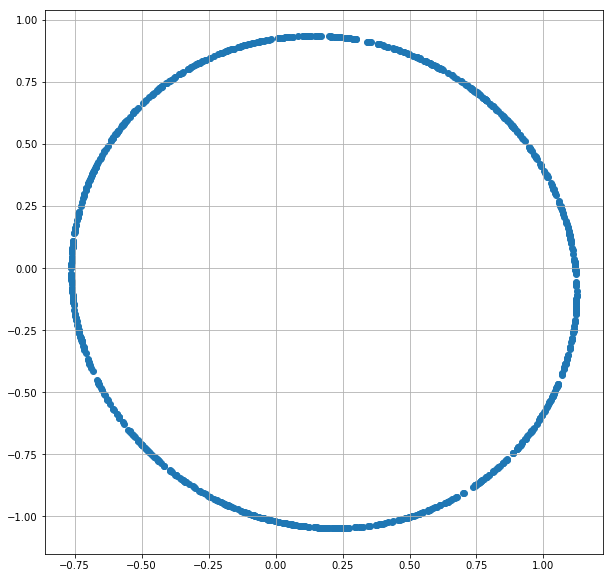

In [4]:
%matplotlib inline
plt.figure(figsize=(10,10))
# plt.scatter(samples[:,0], samples[:,1])
plt.scatter(mapped_samples[:,0], mapped_samples[:,1])
# plt.scatter(normal_code[:,0], normal_code[:,1])
plt.grid()

In [12]:
%matplotlib qt5
# Interactive visualization of the mapping
modules.visualization.plot_latent_space_mapping(samples, mapped_samples, decoded1, decoded2)

In [28]:
%matplotlib qt5
plot_latent_space_mapping(samples, mapped_samples, decoded1, decoded2)

In order to get sequential coloring of data, all of the inputs of the function need to be sorted.


In [27]:
import matplotlib.pyplot as plt


def plot_latent_space_mapping(input_latent_code, output_latent_code, input_decoded, output_decoded):
    print("In order to get sequential coloring of data, all of the inputs of the function need to be sorted.")
    x = input_latent_code[:, 0]
    y = input_latent_code[:, 1]

    # Create figure
    fig = plt.figure(figsize=(20, 10))
    # Create input latent map
    ax = plt.subplot(121)
    line = ax.scatter(x, y, c = range(len(x)), cmap = 'Blues')
    ax.grid()
    ax.set_aspect(1)
    ax.set_title('Input latent space')
    ax.set_xlabel('Z1')
    ax.set_ylabel('Z2')
    # Create output latent map
    ax2 = plt.subplot(122)
    ax2.grid()
    ax2.set_title('Output latent space')
    ax2.set_xlabel('Z1')
    ax2.set_ylabel('Z2')
    ax2.set_aspect(1)
    line2 = ax2.scatter(output_latent_code[:, 0], output_latent_code[:, 1], c = range(len(output_latent_code)), cmap = 'Reds')
    # Create the reconstruction subaxes
    subax = plt.axes([0.65, 0.65, 0.2, 0.2])
    subax.set_visible(False)
    subax2 = plt.axes([0.65, 0.60, 0.2, 0.2])
    subax2.set_visible(False)

    def hover(event):
        # if the mouse is over the scatter points
        if line.contains(event)[0]:
            # find out the index within the array from the event
            ind, = line.contains(event)[1]["ind"]
            # get the figure size
            w, h = fig.get_size_inches() * fig.dpi
            w_inch, h_inch = fig.get_size_inches()
            ws = (event.x > w / 2.) * -1 + (event.x <= w / 2.)
            hs = (event.y > h / 2.) * -1 + (event.y <= h / 2.)
            # if event occurs in the top or right quadrant of the figure,
            # change the annotation box position relative to mouse.
            #         subax.xybox = (xybox[0]*ws, xybox[1]*hs)
            # make annotation box visible

            # Show the data reconstruction from input space
            subax.clear()
            figure_coord = fig.transFigure.inverted().transform((event.x, event.y))
            subax.set_position([figure_coord[0], figure_coord[1], 0.2, 0.2])
            subax.plot(range(len(input_decoded[ind])), input_decoded[ind], 'b')
            subax.set_xticks([])
            subax.set_yticks([])
            subax.set_visible(True)
            # Show the data reconstruction from output space
            subax2.clear()
            display_ax2 = ax2.transData.transform((output_latent_code[ind, 0], output_latent_code[ind, 1]))
            figure_ax2 = fig.transFigure.inverted().transform(display_ax2)
            subax2.set_position([figure_ax2[0], figure_ax2[1], 0.2, 0.2])
            subax2.plot(range(len(output_decoded[ind])), output_decoded[ind], 'b')
            subax2.set_xticks([])
            subax2.set_yticks([])
            subax2.set_visible(True)
            ax2.plot(output_latent_code[ind, 0], output_latent_code[ind, 1], ls="", markersize=10, markeredgewidth=1.5,
                     marker="o", markeredgecolor="k", markerfacecolor='w', color="r")
        else:
            ax2.clear()
            ax2.grid()
            ax2.set_title('Output latent space')
            ax2.set_xlabel('Z1')
            ax2.set_ylabel('Z2')
            ax2.scatter(output_latent_code[:, 0], output_latent_code[:, 1],c = range(len(output_latent_code)), cmap = 'Reds')
            # if the mouse is not over a scatter point
            subax2.set_visible(False)
            subax.set_visible(False)
        fig.canvas.draw_idle()

    # add callback for mouse moves
    fig.canvas.mpl_connect('motion_notify_event', hover)
    plt.show()


c:\anaconda3\lib\site-packages\matplotlib\collections.py:383: UserWarning: Collection picker None could not be converted to float
  % self._picker)
